In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("google_cleaned.csv")
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Day  Month  Year  
0    7      1  2018  
1   15      1  2018  
2    1      8  2018  
3    8      6  2018  
4   20      6  2018

In [3]:
df.isnull()

App  Category  Rating  Reviews   Size  Installs   Type  Price  \
0      False     False   False    False  False     False  False  False   
1      False     False   False    False  False     False  False  False   
2      False     False   False    False  False     False  False  False   
3      False     False   False    False  False     False  False  False   
4      False     False   False    False  False     False  False  False   
...      ...       ...     ...      ...    ...       ...    ...    ...   
10835  False     False   False    False  False     False  False  False   
10836  False     False   False    False  False     False  False  False   
10837  False     False    True    False  False     False  False  False   
10838  False     False   False    False   True     False  False  False   
10839  False     False   False    False  False     False  False  False   

       Content Rating  Genres  Last Updated  Current Ver  Android Ver    Day  \
0               False   False         False        False        False  False   
1               False   False         False        False        False  False   
2               False   False         False        False        False  False   
3               False   False         False        False        False  False   
4               False   False         False        False        False  False   
...               ...     ...           ...          ...          ...    ...   
10835           False   False         False        False        False  False   
10836           False   False         False        False        False  False   
10837           False   False         False        False        False  False   
10838           False   False         False        False        False  False   
10839           False   False         False        False        False  False   

       Month   Year  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
10835  False  False  
10836  False  False  
10837  False  False  
10838  False  False  
10839  False  False  

[10840 rows x 16 columns]

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [5]:
df.isnull().sum().sum()

3180

In [6]:
df.isnull().sum().sort_values()

App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
Type                 1
Android Ver          2
Current Ver          8
Rating            1474
Size              1695
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [8]:
df.shape

(10840, 16)

In [9]:
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10767                                             AAFP       MEDICAL     3.8   

       Reviews  Size   Installs  Type  Price Content Rating        Genres  \
229      80805   NaN    5000000  Free    0.0       Everyone      Business   
236     159872   NaN   10000000  Free    0.0       Everyone      Business   
239      70991   NaN    5000000  Free    0.0       Everyone      Business   
256      31614  37.0   10000000  Free    0.0       Everyone      Business   
261       6989   NaN    1000000  Free    0.0       Everyone      Business   
...        ...   ...        ...   ...    ...            ...           ...   
8643    404610   NaN   10000000  Free    0.0       Everyone  Productivity   
8654     25370   NaN    1000000  Free    0.0       Everyone  Productivity   
8658   2401017   NaN  100000000  Free    0.0       Everyone  Productivity   
10049      123  86.0      10000  Free    0.0       Everyone       Medical   
10767       63  24.0      10000  Free    0.0       Everyone       Medical   

      Last Updated         Current Ver         Android Ver  Day  Month  Year  
229     2018-02-26  Varies with device        4.0.3 and up   26      2  2018  
236     2018-07-31  Varies with device  Varies with device   31      7  2018  
239     2018-07-24    2.19.0.204537701          4.4 and up   24      7  2018  
256     2018-07-20      4.1.28165.0716          4.0 and up   20      7  2018  
261     2018-07-16           4.3.0.508          4.4 and up   16      7  2018  
...            ...                 ...                 ...  ...    ...   ...  
8643    2018-04-06  Varies with device  Varies with device    6      4  2018  
8654    2018-08-06  Varies with device  Varies with device    6      8  2018  
8658    2018-06-27  Varies with device  Varies with device   27      6  2018  
10049   2018-06-01              0.6.88          5.0 and up    1      6  2018  
10767   2018-06-22               2.3.1          5.0 and up   22      6  2018  

[483 rows x 16 columns]

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(10357, 16)

In [12]:
null_counts=df.isna().sum().sort_values(ascending=False)/len(df)
null_counts

Size              0.147340
Rating            0.141450
Current Ver       0.000772
Android Ver       0.000193
Type              0.000097
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Day               0.000000
Month             0.000000
Year              0.000000
dtype: float64

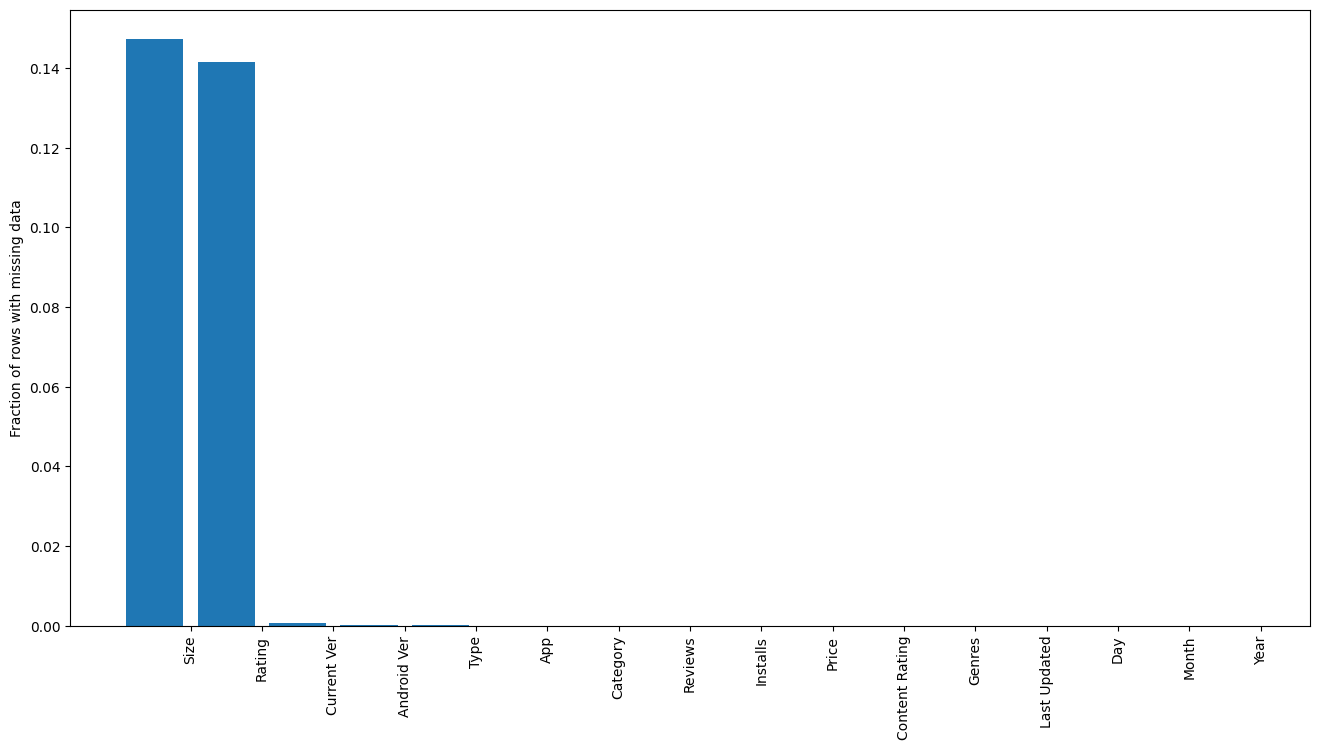

In [13]:
null_counts=df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index, rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [14]:
df_copy=df.copy()
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10835                                   Sya9a Maroc - FR               FAMILY   
10836                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10837                             Parkinson Exercices FR              MEDICAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10839      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
0         4.1      159  19.0     10000  Free    0.0       Everyone   
1         3.9      967  14.0    500000  Free    0.0       Everyone   
2         4.7    87510   8.7   5000000  Free    0.0       Everyone   
3         4.5   215644  25.0  50000000  Free    0.0           Teen   
4         4.3      967   2.8    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10835     4.5       38  53.0      5000  Free    0.0       Everyone   
10836     5.0        4   3.6       100  Free    0.0       Everyone   
10837     NaN        3   9.5      1000  Free    0.0       Everyone   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   
10839     4.5   398307  19.0  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10835                  Education   2017-07-25                1.48   
10836                  Education   2018-07-06                 1.0   
10837                    Medical   2017-01-20                 1.0   
10838          Books & Reference   2015-01-19  Varies with device   
10839                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  Day  Month  Year  
0            4.0.3 and up    7      1  2018  
1            4.0.3 and up   15      1  2018  
2            4.0.3 and up    1      8  2018  
3              4.2 and up    8      6  2018  
4              4.4 and up   20      6  2018  
...                   ...  ...    ...   ...  
10835          4.1 and up   25      7  2017  
10836          4.1 and up    6      7  2018  
10837          2.2 and up   20      1  2017  
10838  Varies with device   19      1  2015  
10839  Varies with device   25      7  2018  

[10357 rows x 16 columns]

In [15]:
# Columns which have null values.
cols=[var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [16]:
df_copy['Rating'].isnull().mean()*100

14.145022689968137

In [17]:
df_copy['Installs'].isnull().mean()*100

0.0

In [18]:
for var in df_copy.columns:
    print(var)

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
Day
Month
Year


In [19]:
df_copy.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Day  Month  Year  
0    7      1  2018  
1   15      1  2018  
2    1      8  2018  
3    8      6  2018  
4   20      6  2018

In [20]:
df_copy[cols]

Rating  Size  Type         Current Ver         Android Ver
0         4.1  19.0  Free               1.0.0        4.0.3 and up
1         3.9  14.0  Free               2.0.0        4.0.3 and up
2         4.7   8.7  Free               1.2.4        4.0.3 and up
3         4.5  25.0  Free  Varies with device          4.2 and up
4         4.3   2.8  Free                 1.1          4.4 and up
...       ...   ...   ...                 ...                 ...
10835     4.5  53.0  Free                1.48          4.1 and up
10836     5.0   3.6  Free                 1.0          4.1 and up
10837     NaN   9.5  Free                 1.0          2.2 and up
10838     4.5   NaN  Free  Varies with device  Varies with device
10839     4.5  19.0  Free  Varies with device  Varies with device

[10357 rows x 5 columns]

In [21]:
drop_df=df_copy[cols].dropna()
drop_df

Rating    Size  Type         Current Ver         Android Ver
0         4.1  19.000  Free               1.0.0        4.0.3 and up
1         3.9  14.000  Free               2.0.0        4.0.3 and up
2         4.7   8.700  Free               1.2.4        4.0.3 and up
3         4.5  25.000  Free  Varies with device          4.2 and up
4         4.3   2.800  Free                 1.1          4.4 and up
...       ...     ...   ...                 ...                 ...
10832     4.8   0.619  Free                 0.8          2.2 and up
10833     4.0   2.600  Free               1.0.0          4.1 and up
10835     4.5  53.000  Free                1.48          4.1 and up
10836     5.0   3.600  Free                 1.0          4.1 and up
10839     4.5  19.000  Free  Varies with device  Varies with device

[7418 rows x 5 columns]

In [22]:
df_copy.shape

(10357, 16)

In [23]:
drop_df.shape

(7418, 5)

In [24]:
drop_df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10832    4.8
10833    4.0
10835    4.5
10836    5.0
10839    4.5
Name: Rating, Length: 7418, dtype: float64

In [25]:
df_copy['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    NaN
10838    4.5
10839    4.5
Name: Rating, Length: 10357, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

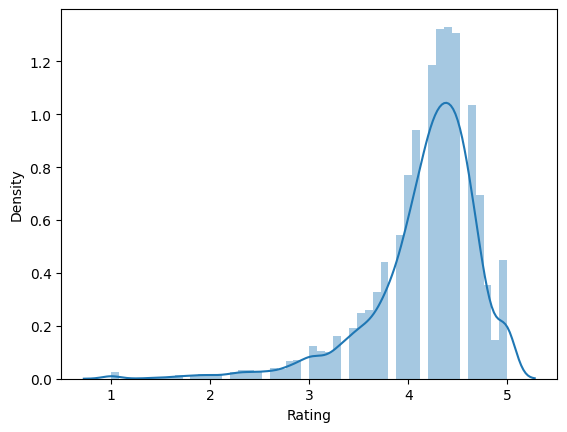

In [26]:
sns.distplot(drop_df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

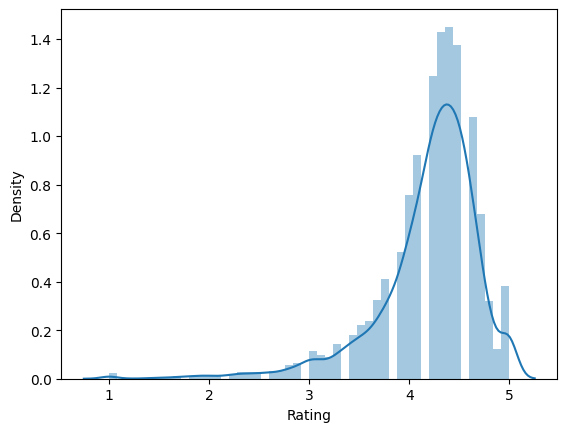

In [27]:
sns.distplot(df_copy['Rating'])

### Mean, Median, Mode 

In [28]:
df_copy_me_mo=df.copy()
df_copy_me_mo

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10835                                   Sya9a Maroc - FR               FAMILY   
10836                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10837                             Parkinson Exercices FR              MEDICAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10839      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
0         4.1      159  19.0     10000  Free    0.0       Everyone   
1         3.9      967  14.0    500000  Free    0.0       Everyone   
2         4.7    87510   8.7   5000000  Free    0.0       Everyone   
3         4.5   215644  25.0  50000000  Free    0.0           Teen   
4         4.3      967   2.8    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10835     4.5       38  53.0      5000  Free    0.0       Everyone   
10836     5.0        4   3.6       100  Free    0.0       Everyone   
10837     NaN        3   9.5      1000  Free    0.0       Everyone   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   
10839     4.5   398307  19.0  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10835                  Education   2017-07-25                1.48   
10836                  Education   2018-07-06                 1.0   
10837                    Medical   2017-01-20                 1.0   
10838          Books & Reference   2015-01-19  Varies with device   
10839                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  Day  Month  Year  
0            4.0.3 and up    7      1  2018  
1            4.0.3 and up   15      1  2018  
2            4.0.3 and up    1      8  2018  
3              4.2 and up    8      6  2018  
4              4.4 and up   20      6  2018  
...                   ...  ...    ...   ...  
10835          4.1 and up   25      7  2017  
10836          4.1 and up    6      7  2018  
10837          2.2 and up   20      1  2017  
10838  Varies with device   19      1  2015  
10839  Varies with device   25      7  2018  

[10357 rows x 16 columns]

In [29]:
df_copy_me_mo['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838     NaN
10839    19.0
Name: Size, Length: 10357, dtype: float64

In [30]:
#Using mean
df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].mean())

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10835    53.000000
10836     3.600000
10837     9.500000
10838    21.277437
10839    19.000000
Name: Size, Length: 10357, dtype: float64

In [31]:
# Using median similarly we use mode.....
df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].median())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838    13.0
10839    19.0
Name: Size, Length: 10357, dtype: float64

In [32]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].mean()).isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838    False
10839    False
Name: Size, Length: 10357, dtype: bool

In [33]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].mean()).isna().sum()

0

<AxesSubplot:xlabel='Size', ylabel='Density'>

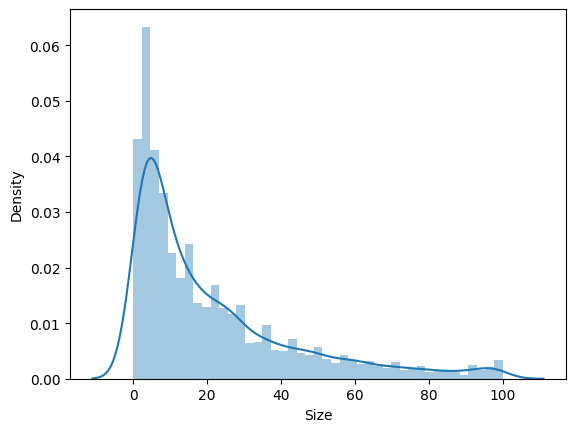

In [34]:
sns.distplot(df["Size"])

<AxesSubplot:xlabel='Size', ylabel='Density'>

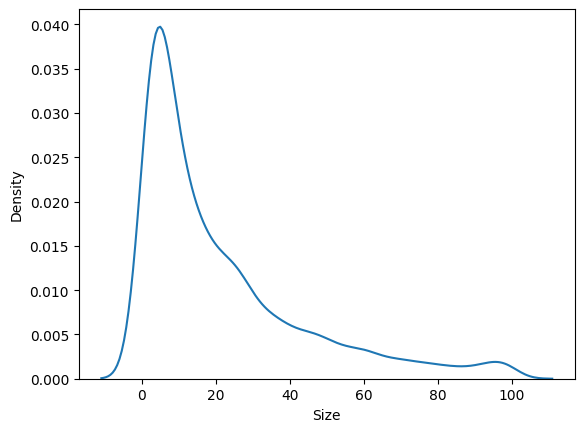

In [36]:
sns.kdeplot(df["Size"])

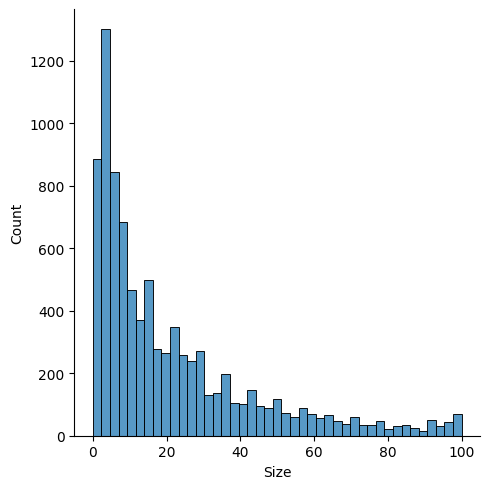

In [37]:
sns.displot(df["Size"])

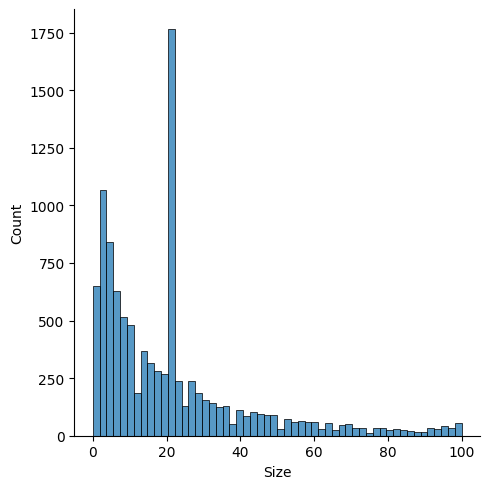

In [38]:
sns.displot(df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].mean()))

<AxesSubplot:xlabel='Size', ylabel='Density'>

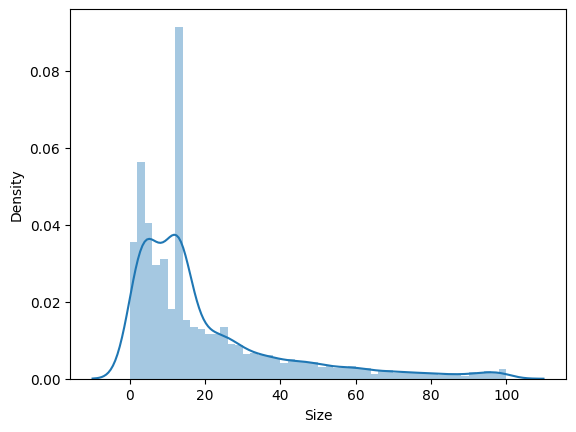

In [40]:
sns.distplot(df_copy_me_mo['Size'].fillna(df_copy_me_mo["Size"].median()))

###  Distributation of the Data 
### Random Sample Imputation

In [41]:
df_random=df.copy()
df_random

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10835                                   Sya9a Maroc - FR               FAMILY   
10836                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10837                             Parkinson Exercices FR              MEDICAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10839      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
0         4.1      159  19.0     10000  Free    0.0       Everyone   
1         3.9      967  14.0    500000  Free    0.0       Everyone   
2         4.7    87510   8.7   5000000  Free    0.0       Everyone   
3         4.5   215644  25.0  50000000  Free    0.0           Teen   
4         4.3      967   2.8    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10835     4.5       38  53.0      5000  Free    0.0       Everyone   
10836     5.0        4   3.6       100  Free    0.0       Everyone   
10837     NaN        3   9.5      1000  Free    0.0       Everyone   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   
10839     4.5   398307  19.0  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10835                  Education   2017-07-25                1.48   
10836                  Education   2018-07-06                 1.0   
10837                    Medical   2017-01-20                 1.0   
10838          Books & Reference   2015-01-19  Varies with device   
10839                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  Day  Month  Year  
0            4.0.3 and up    7      1  2018  
1            4.0.3 and up   15      1  2018  
2            4.0.3 and up    1      8  2018  
3              4.2 and up    8      6  2018  
4              4.4 and up   20      6  2018  
...                   ...  ...    ...   ...  
10835          4.1 and up   25      7  2017  
10836          4.1 and up    6      7  2018  
10837          2.2 and up   20      1  2017  
10838  Varies with device   19      1  2015  
10839  Varies with device   25      7  2018  

[10357 rows x 16 columns]

In [46]:
df_random["Size"].isnull().sum()

1526

In [52]:
df_random["Size"].sample(3)

5006    17.0
8321     8.3
9791     1.2
Name: Size, dtype: float64

In [49]:
df_random["Size"].dropna().sample()

10557    12.0
Name: Size, dtype: float64

In [50]:
df_random["Size"].dropna().sample(7)

347      11.0
5173     27.0
10071    19.0
1071     42.0
4037     41.0
5710      5.7
5371      1.4
Name: Size, dtype: float64

In [51]:
random_sample=df_random["Size"].dropna().sample(df_random["Size"].isnull().sum())
random_sample

10553    21.0
8977     17.0
8751     36.0
9490      1.3
8882      1.3
         ... 
7915     25.0
10704     5.2
5452     13.0
698       9.3
7340      7.7
Name: Size, Length: 1526, dtype: float64

In [53]:
df_random[df_random["Size"].isnull()]

App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10712  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10724                                          Posta App  MAPS_AND_NAVIGATION   
10764                    Chat For Strangers - Video Chat               SOCIAL   
10825          Frim: get new friends on local chat rooms               SOCIAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
37        4.1    36639   NaN   5000000  Free    0.0       Everyone   
42        4.4   295221   NaN  10000000  Free    0.0       Everyone   
52        4.6    17057   NaN   1000000  Free    0.0       Everyone   
67        4.3    40211   NaN   5000000  Free    0.0       Everyone   
68        3.9      356   NaN    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10712     4.4     3471   NaN    100000  Free    0.0       Everyone   
10724     3.6        8   NaN      1000  Free    0.0       Everyone   
10764     3.4      622   NaN    100000  Free    0.0     Mature 17+   
10825     4.0    88486   NaN   5000000  Free    0.0     Mature 17+   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   

                  Genres Last Updated         Current Ver         Android Ver  \
37          Art & Design   2018-07-14  Varies with device        2.3.3 and up   
42          Art & Design   2018-07-30  Varies with device  Varies with device   
52       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
67       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
68       Auto & Vehicles   2018-05-25  Varies with device  Varies with device   
...                  ...          ...                 ...                 ...   
10712            Weather   2018-07-24  Varies with device  Varies with device   
10724  Maps & Navigation   2017-09-27  Varies with device          4.4 and up   
10764             Social   2018-05-23  Varies with device  Varies with device   
10825             Social   2018-03-23  Varies with device  Varies with device   
10838  Books & Reference   2015-01-19  Varies with device  Varies with device   

       Day  Month  Year  
37      14      7  2018  
42      30      7  2018  
52      30      7  2018  
67      30      7  2018  
68      25      5  2018  
...    ...    ...   ...  
10712   24      7  2018  
10724   27      9  2017  
10764   23      5  2018  
10825   23      3  2018  
10838   19      1  2015  

[1526 rows x 16 columns]

In [54]:
df_random[df_random["Size"].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825,
            10838],
           dtype='int64', length=1526)